In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dat = pd.read_csv("task_data.csv", index_col='sample index')

In [3]:
dat.head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
sample index,,,,,,,,,,,
sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [4]:
dat.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [5]:
varlist = dat.select_dtypes(include='number').columns

In [6]:
varlist

Index(['class_label', 'sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4',
       'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9'],
      dtype='object')

In [7]:
def plot_all(data):
    varlist = data.select_dtypes(include='number').columns
    print("N_num_cols=",len(varlist))
    nbins=1
    for i in varlist:
        plt.figure(i) 
        if i == 'class_label': nbins = 2
        else: nbins = 40
        sns.distplot(data[i], bins=nbins) # kde=False
        plt.savefig("Plots/"+i+".png", transparent=True)
        plt.close(i)

In [8]:
plot_all(dat)

N_num_cols= 11


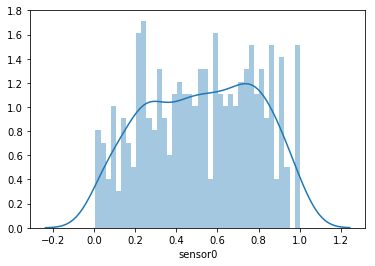

In [9]:
sns.distplot(dat.sensor0,bins=40)

In [10]:
len(dat.loc[dat.class_label==1])

200

In [11]:
def check_missing(features):
    list_of_columns=list(features)
    num_rows=len(features)
    print ("N_features %.f, N_rows %.f" % (len(list_of_columns),num_rows))

    list_of_incomplete=[]
    print ("Missing: ")
    for i in range(0,len(list_of_columns)-1):
        i_count = features[list_of_columns[i]].count()
        if i_count!=num_rows:
            print ("%s , %.f " % (list_of_columns[i],100-i_count/num_rows*100))
            list_of_incomplete.append((i,list_of_columns[i],100-i_count/num_rows*100))
    return list_of_incomplete

In [12]:
check_missing(dat)

N_features 11, N_rows 400
Missing: 


[]

In [13]:
len(dat.loc[dat.class_label==-1])

200

In [14]:
len(dat.loc[dat.class_label==0])

0

In [16]:
correlations = dat.corr()

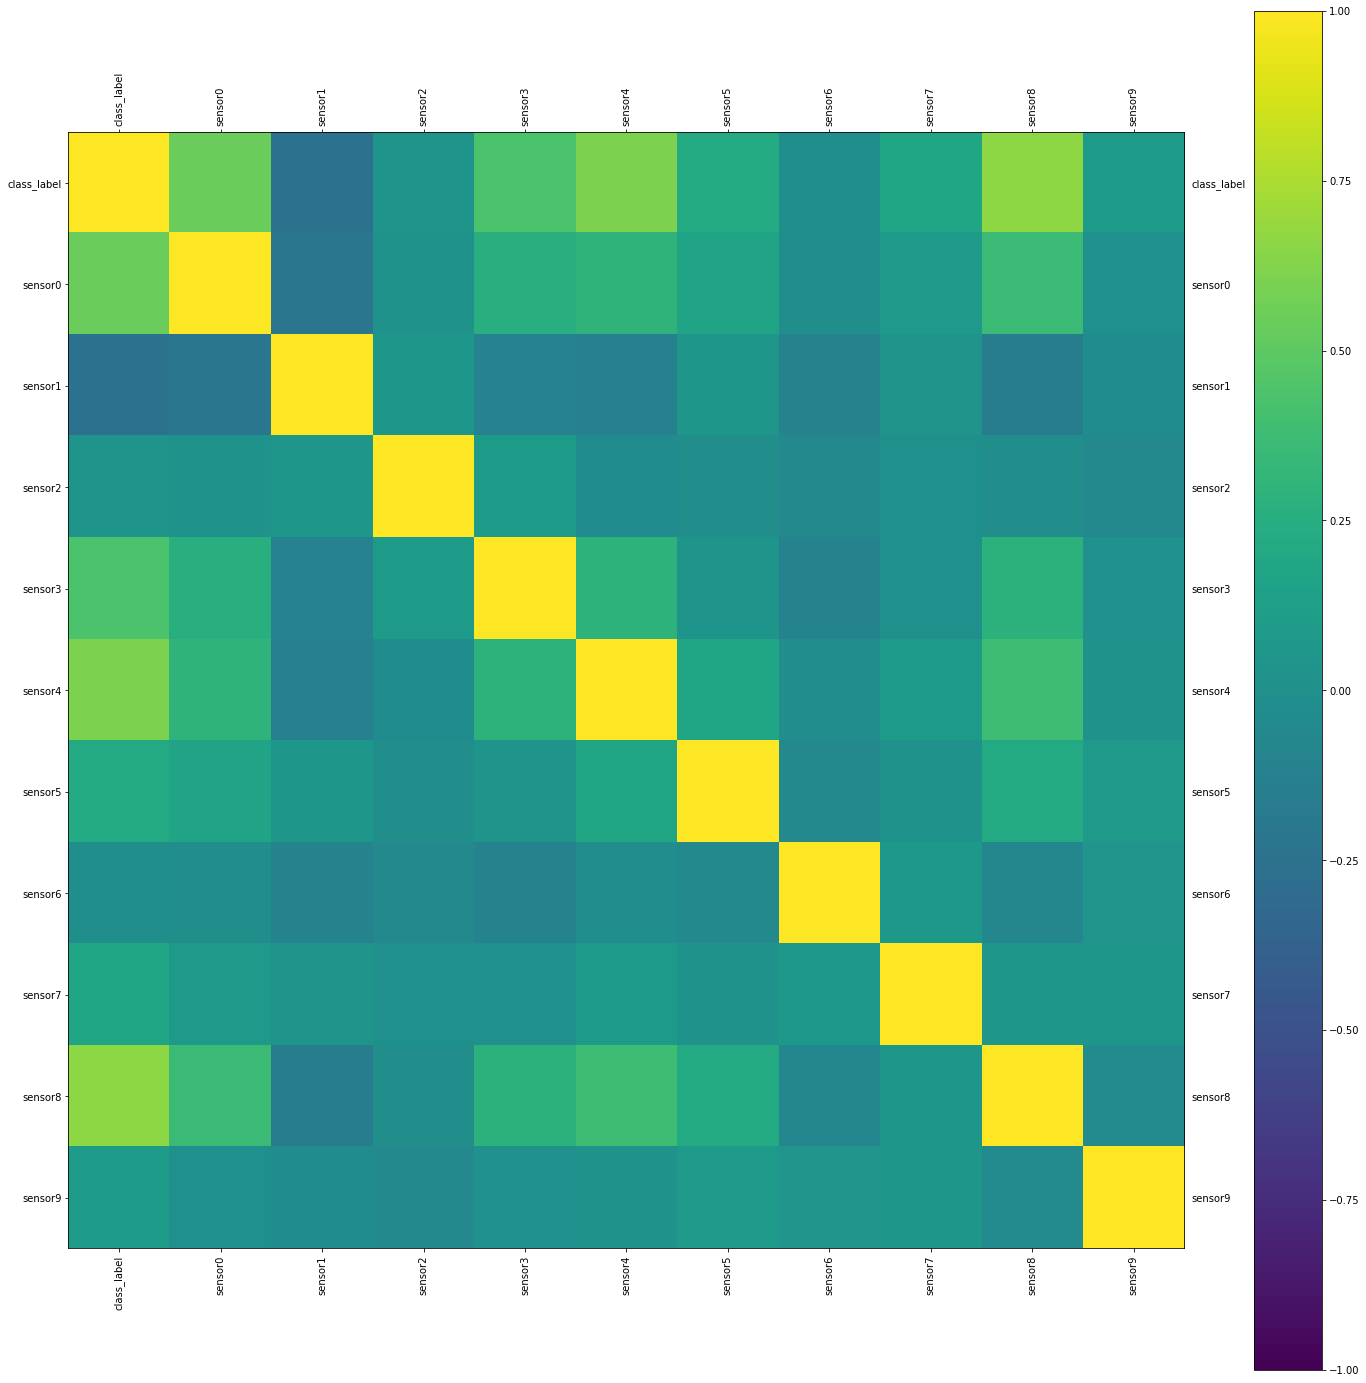

In [17]:
# plot correlation matrix
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation=90)
ax.tick_params(labelbottom=True, labelright=True)
plt.xticks(rotation=90)
ticks = np.arange(0,len(varlist),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varlist)
ax.set_yticklabels(varlist)
plt.savefig("Plots/corr_all_variabls.png", transparent=True)
plt.show()

In [24]:
def pair_plot(ds,varlist):
    plt.figure("paiplot")
    sns.pairplot(ds,vars=varlist,hue='class_label', diag_kind="kde")
    plt.savefig("Plots/pairplot.png", transparent=True)
    plt.close("paiplot")

In [23]:
#dat[['sensor0','sensor1','class_label']]

In [44]:
varlist_f = list(varlist)

In [46]:
varlist_f.remove('class_label')

In [47]:
print(varlist_f)

['sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9']


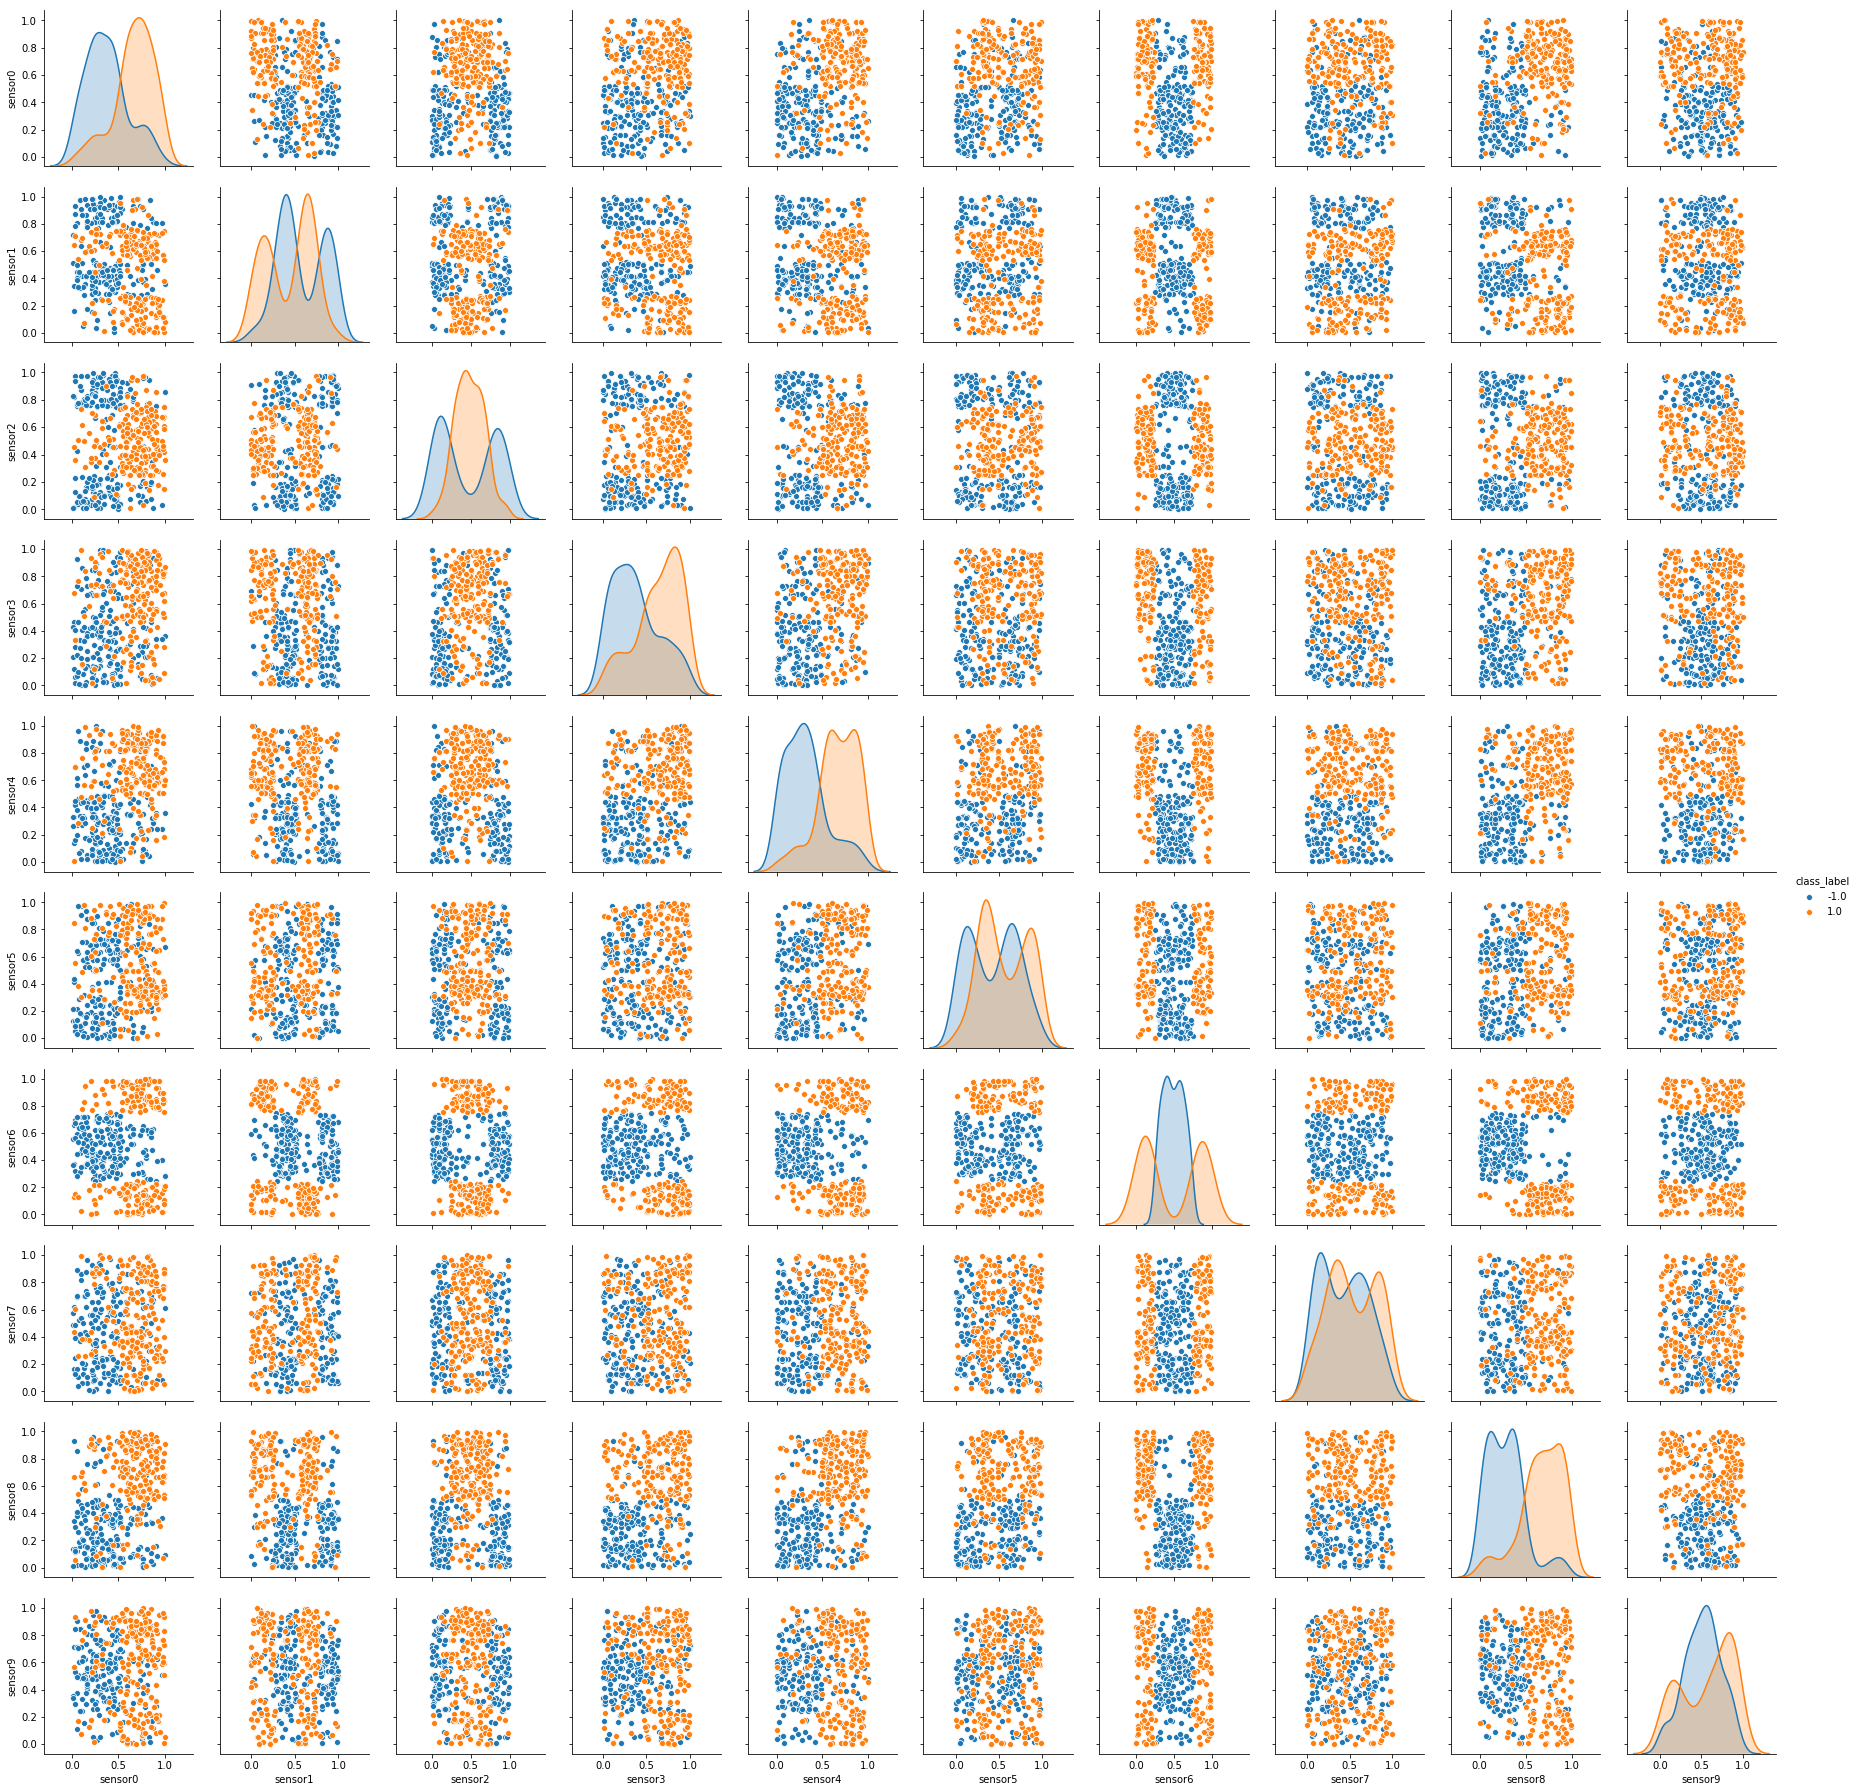

In [43]:
pair_plot(dat,varlist_f)